# Case Study 1: Finding the winning strategy in a card game

### Problem statement
Would you like to win a bit of money? Let’s wager on a card game for minor stakes. In front of you is a shuffled deck of cards. All 52 cards lie face down. Half the cards are red, and half are black. I will proceed to flip over the cards one by one. If the last card I flip over is red, you’ll win a dollar. Otherwise, you’ll lose a dollar.

Here’s the twist: you can ask me to halt the game at any time. Once you say “Halt,” I will flip over the next card and end the game. That next card will serve as the final card. You will win a dollar if it’s red, as shown in figure CS1.1.

We can play the game as many times as you like. The deck will be reshuffled every time. After each round, we’ll exchange money. What is your best approach to winning this game?

### Overview
To address the problem at hand, we will need to know how to
1. Compute the probabilities of observable events using sample space analysis.
2. Plot the probabilities of events across a range of interval values.
3. Simulate random processes, such as coin flips and card shuffling, using Python.
4. Evaluate our confidence in decisions drawn from simulations using confidence interval analysis.

# Section 1 Computing probabilities using Python

- Computing probabilities of a single observation
- Computing probabilities across a range of observations

## 1.1 Sample space analysis: An equation-free approach for measuring uncertainty in outcomes

- **Outcome**: assign probabilities to two measurable outcomes
- **Event**: the subset of those elements within `sample_space` that satisfy some `event condition`

    - Event condition: a simple Boolean function whose input is a single `sample_space` element. The function returns `True` only if the element satisfies our condition constraints.

In [1]:
# Creating a sample space of coin flips
sample_space = {'Heads', 'Tails'}
# Computing the probability of heads
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


In [2]:
# Defining event conditions
def is_heads_or_tails(outcome):
    return outcome in {'Heads', 'Tails'}

def is_neither(outcome):
    return not is_heads_or_tails(outcome)

# Defining additional event conditions
def is_heads(outcome):
    return outcome == 'Heads'

def is_tails(outcome):
    return outcome == 'Tails'

We can pass event conditions into a generalized `get_matching_event` function. Its inputs are an event condition and a generic sample space. The function iterates through the generic sample space and returns the set of outcomes where `event_condition(outcome)` is `True`. 

In [3]:
# Defining an event-detection function
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space
               if event_condition(outcome)])

# Detecting events using event conditions
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}") # prints the name of an event_condition function
    event = get_matching_event(event_condition, sample_space)
    print(f'Event: {event}\n')

Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



The probability of a single-element outcome for a fair coin is `1 / len(sample_space)`. This property can be generalized to include multi-element events. The probability of an event is equal to `len(event) / len(sample_space)`, but only if all outcomes are known to occur with equal likelihood. 

In [4]:
# Computing event probabilities
def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)

for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of evnet arising from '{name}' is {prob}")

Probability of evnet arising from 'is_heads_or_tails' is 1.0
Probability of evnet arising from 'is_heads' is 0.5
Probability of evnet arising from 'is_tails' is 0.5
Probability of evnet arising from 'is_neither' is 0.0


### 1.1.1 Analyzing a biased coin

What would happen if that coin was biased? Suppose, for instance, that a coin is four times more likely to land on heads relative to tails. How do we compute the likelihoods of outcomes that are not weighted in an equal manner? Well, we can construct a weighted sample space represented by a Python **dictionary**. Each outcome is treated as a key whose value maps to the associated weight. 

In [5]:
# Representing a weighted sample space
weighted_sample_space = {'Heads': 4, 'Tails': 1}

# Checking the weighted sample space size
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

# Checking the weighted event size
event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

Our generalized definitions of sample space size and event size permit us to create a `compute_event_probability` function. The function takes as input a `generic_sample_ space `variable that can be either a weighted dictionary or an unweighted set.

In [ ]:
# Defining a generalized event probability function
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space)  == type(set()): # check whether generic_event_space is a set
        return len(event) / len(generic_sample_space)
    
    event_size = sum(generic_sample_space[outcome] 
                     for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [ ]:
# Computing weighted event probabilities
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


## 1.2 Computing nontrivial probabilities
We'll now solve several example problems using `compute_event_probability`.

### 1.2.1 Problem 1: Analyzing a family with four children
Suppose a family has four children. What is the probability that exactly two of the children are boys? We’ll assume that each child is equally likely to be either a boy or a girl. Thus we can construct an unweighted sample space where each outcome represents one possible sequence of four children.

In [8]:
# Computing the sample space of children
possible_children = ['Boy', 'Girl']
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4) 
                # Each possible sequence of four children is represented by a four-element tuple.
                sample_space.add(outcome)

This is not an efficient use of code. We can more easily generate our sample space using Python’s built-in `itertools.product` function, which returns all pairwise combinations of all elements across all input lists. 

In [9]:
# Computing the sample space using `product`
from itertools import product
all_combinations = product(*(4 * [possible_children])) 
# The * operator unpacks multiple arguments stored within a list. 
# These arguments are then passed into a specified function. 
# Thus, calling product(*(4 * [possible_children])) is equivalent to calling 
# product(possible_children, possible_children, possible_children, possible_children).
assert set(all_combinations) == sample_space
# Note that after running this line, all_combinations will be empty. 
# This is because product returns a Python iterator, which can be iterated over only once. 
# For us, this isn’t an issue. We are about to compute the sample space even more efficiently, 
# and all_combinations will not be use in future code.

In [10]:
# Passing `repeat` into `product`
sample_space_efficient = set(product(possible_children, repeat = 4))
assert sample_space == sample_space_efficient

In [11]:
# Computing the probability of two boys
def has_two_boys(outcome):
    return len([child for child in outcome
               if child == 'Boy']) == 2

prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}")

Probability of 2 boys is 0.375


### 1.2.2 Problem 2: Analyzing multiple die rolls
Suppose we’re shown a fair six-sided die whose faces are numbered from 1 to 6. The die is rolled six times. What is the probability that these six die rolls add up to 21?

We begin by defining the possible values of any single roll. These are integers that range from 1 to 6.

In [12]:
# Defining all possible rolls of a six-sided die
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


Next, we create the sample space for six consecutive rolls using the `product` function.

In [13]:
# Sample space for six consecutive die rolls
sample_space = set(product(possible_rolls, repeat = 6))

Finally, we define a `has_sum_of_21` event condition that we'll subsequently pass into `compute_event_probability`.

In [14]:
# Coumputing the probability of a die-roll sum
def has_sum_of_21(outcome):
    return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


Note that our analysis can be coded more concisely using a lambda expression. *Lambda expressions* are one-line anonymous functions that do not require a name. In this book, we use lambda expressions to pass short functions into other functions.

In [15]:
# Computing the probability using a lambda expression
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
# Lambda expressions allow us to define short functions in a single line of code. 
# Coding lambda x: is functionally equivalent to coding func(x):. 
# Thus, lambda x: sum(x) == 21 is functionally equivalent to has_sum_of_21.
assert prob == compute_event_probability(lambda x: sum(x) == 21, sample_space)

### 1.2.3 Problem 3: Computing die-roll probabilities using weighted sample spaces

We need to convert our unweighted sample space set into a weighted sample space dictionary; this will require us to identify all possible die-roll sums. Then we must count the number of times each sum appears across all possible die-roll combinations. These combinations are already stored in our computed `sample_space` set. By mapping the die-roll sums to their occurrence counts, we will produce a `weighted_sample_space` result.

In [16]:
# Mapping die-roll sums to occurrence counts
from collections import defaultdict # This module returns dictionaries whose keys are all assigned a default value. 
# For instance, defaultdict(int) returns a dictionary where the default value for each key is set to zero.
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1
    
# Checking very rare die-roll combinations
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

In [17]:
# Checking a more common die-roll combination
num_combinations = weighted_sample_space[21]
print(f"There are {num_combinations} ways for 6 die rolls to sum to 21")

There are 4332 ways for 6 die rolls to sum to 21


In [18]:
# Exploring different ways of summing to 21
assert sum ([4, 4, 4, 4, 3, 2]) == 21
assert sum ([4, 4, 4, 5, 3, 1]) == 21

# Comparing weighted events and regular events
event = get_matching_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)

# Computing the weighted event probability of die rolls
prob = compute_event_probability(lambda x: x == 21, weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


What is the benefit of using a weighted sample space over an unweighted one? Less memory usage! As we see next, the unweighted sample_space set has on the order of 150 times more elements than the weighted sample space dictionary.

In [19]:
print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space))

Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


## 1.3 Computing probabilities over Interval ranges
Now we’ll analyze event conditions that span intervals of values. An *interval* is the set of all the numbers between and including two boundary cutoffs. Let’s define an `is_in_interval` function that checks whether a number falls within a specified interval. We’ll control the interval boundaries by passing a `minimum` and a `maximum` parameter.

In [20]:
# Defining an interval function
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

In [21]:
# Computing the probability over an interval
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21),
                                weighted_sample_space)
print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078


### 1.3.1 Evaluating extremes using interval analysis
Interval analysis is critical to solving a whole class of very important problems in prob- ability and statistics. One such problem involves the evaluation of extremes: the problem boils down to whether observed data is too extreme to be believable.

Data seems extreme when it is too unusual to have occurred by random chance. For instance, suppose we observe 10 flips of an allegedly fair coin, and that coin lands on heads 8 out of 10 times. Is this a sensible result for a fair coin? Or is our coin secretly biased toward landing on heads? To find out, we must answer the following question: what is the probability that 10 fair coin flips lead to an extreme number of heads? We’ll define an extreme head count as eight heads or more. Thus, we can describe the problem as follows: what is the probability that 10 fair coin flips produce from 8 to 10 heads?

We’ll find our answer by computing an interval probability. However, first we need the sample space for every possible sequence of 10 flipped coins. Let’s generate a weighted sample space. As previously discussed, this is more efficient than using a non-weighted representation.

The following code creates a `weighted_sample_space` dictionary. Its keys equal the total number of observable heads, ranging from 0 through 10. These head counts map to values. Each value holds the number of coin-flip combinations that contain the associated head count. We thus expect `weighted_sample_space[10]` to equal 1, since there is just one possible way to flip a coin 10 times and get 10 heads. Meanwhile, we expect `weighted_sample_space[9]` to equal 10, since a single tail among 9 heads can occur across 10 different positions.

In [22]:
# Computing the sample space for 10 coin flips
def generate_coin_sample_space(num_flips=10):
#   For reusability, we define a general function that returns a weighted sample space for num_flips coin flips. 
#   The num_flips parameter is preset to 10 coin flips.
   
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat = num_flips):
        heads_count = len([outcome for outcome in coin_flips
                          if outcome == 'Heads']) # Number of heads in a unique sequence of num_flips coin flips
        weighted_sample_space[heads_count] += 1
        
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10

Our weighted sample space is ready. We now compute the probability of observing an interval from 8 to 10 heads.

In [23]:
# Computing an extreme head-count probability
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10),
                                weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


Ten fair coin flips produce more than seven heads approximately 5% of the time. Our observed head count does not commonly occur. Does this mean the coin is biased? Not necessarily. We haven’t yet considered extreme tail counts. If we had observed eight tails and not eight heads, we would have still been suspicious of the coin. Our computed interval did not take this extreme into account—-instead, we treated eight or more tails as just another normal possibility. To evaluate the fairness of our coin, we must include the likelihood of observing eight tails or more. This is equivalent to observing two heads or fewer.

Let’s formulate the problem as follows: what is the probability that 10 fair coin flips produce either 0 to 2 heads or 8 to 10 heads? Or, stated more concisely, what is the probability that the coin flips do not produce from 3 to 7 heads? That probability is computed here.

In [24]:
# Computing an extreme interval probability
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7),
                                weighted_sample_space)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")

Probability of observing more than 7 heads or 7 tails is 0.109375


Ten fair coin flips produce at least eight identical results approximately 10% of the time. That probability is low but still within the realm of plausibility. Without addi- tional evidence, it’s difficult to decide whether the coin is truly biased. So, let’s collect that evidence. Suppose we flip the coin 10 additional times, and 8 more heads come up. This brings us to 16 heads out of 20 coin flips total. Our confidence in the fairness of the coin has been reduced, but by how much? We can find out by measuring the change in probability. Let’s find the probability of 20 fair coin flips not producing from 5 to 15 heads.

In [25]:
# Analyzing extreme head counts for 20 fair coin flips
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


The updated probability has dropped from approximately 0.1 to approximately 0.01. Thus, the added evidence has caused a tenfold decrease in our confidence in the coin’s fairness. Despite this probability drop, the ratio of heads to tails has remained constant at 4 to 1. Both our original and updated experiments produced 80% heads and 20% tails. This leads to an interesting question: why does the probability of observing an extreme result decrease as the coin is flipped more times? We can find out through detailed mathematical analysis. However, a much more intuitive solution is to just visualize the distribution of head counts across our two sample space dictio- naries. The visualization would effectively be a plot of keys (head counts) versus values (combination counts) present in each dictionary. We can carry out this plot using Matplotlib.

# Section 2: Ploting probabilities using Matplotlib

- creating simple plots using Matplotlib
- Labeling plotted data
- What is a probability distribution?
- Plotting and comparing multiple probability distributions

## 2.1 Basic Matplotlib plots

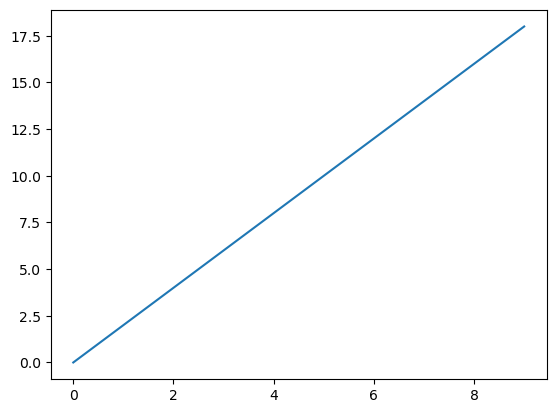

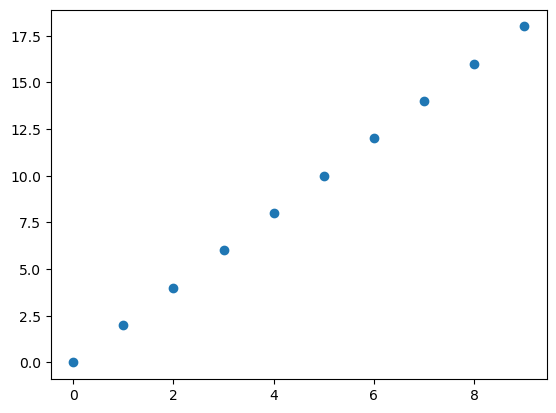

In [26]:
import matplotlib.pyplot as plt

# Plotting a linear relationship
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

# Plotting individual data points
plt.scatter(x, y)
plt.show()

Suppose we want to emphasize the interval where x begins at 2 and ends at 6. We do this by shading the area under the plotted curve over the specified interval, using the `plt.fill_between` method. The method takes as input both `x` and `y` and also a `where` parameter, which defines the interval coverage. The input of the `where` parameter is a list of Boolean values in which an element is `True` if the `x` value at the corresponding index falls within the interval we specified.

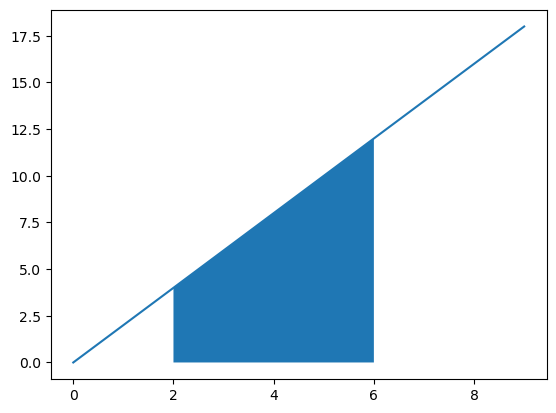

In [27]:
# Shading an interval beneath a connected plot
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

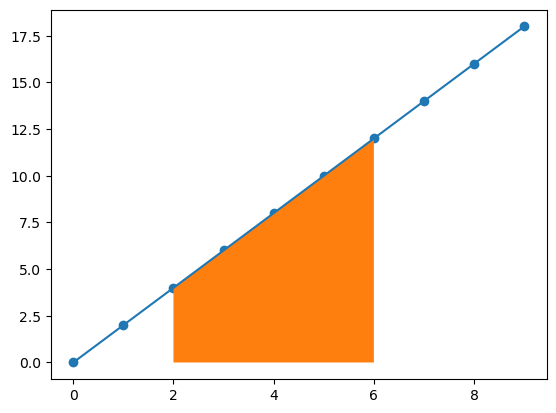

In [28]:
# Exposing Individual coordinates within a continuous plot
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

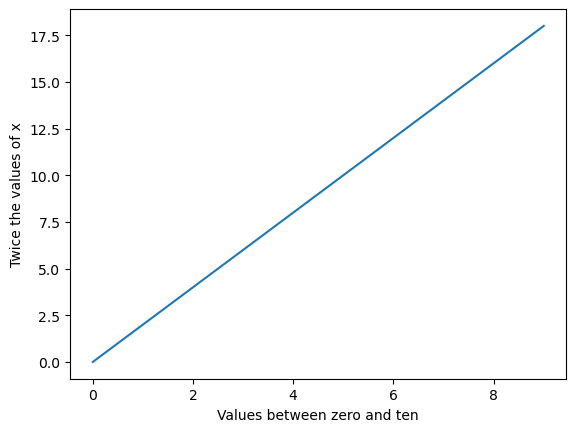

In [29]:
# Adding axis labels
plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

## 2.2 Plotting coin-flip probabilities

In section 1, we examined the probability of seeing 80% or more heads across a series of coin flips. That probability decreased as the coin-flip count went up, and we wanted to know why. We’ll soon find out by plotting head counts ver- sus their associated coin-flip combination counts. These values were already computed in our section 1 analysis.

Our aim is to compare the plotted data from both these dictionaries. We begin by plotting the elements of `weighted_sample_space`: we plot its keys on the x-axis versus the associated values on the y-axis. The x-axis corresponds to `'Head-count'`, and the y-axis corresponds to `'Number of coin-flip combinations with x heads'`. We use a scatter plot to visualize key-to-value relationships directly without connecting any plotted points.

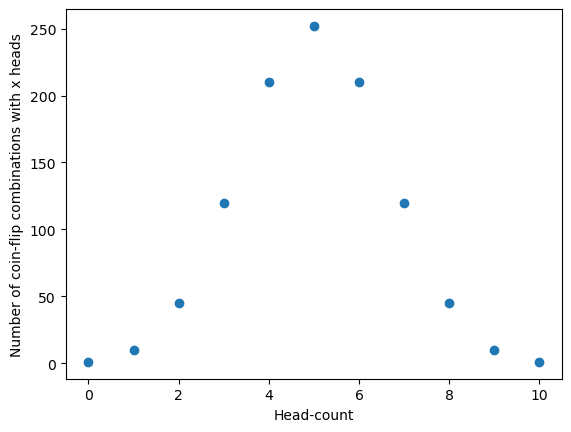

In [30]:
# Plotting the coin-flip weighted sample space
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

The visualized sample space takes on a symmetric shape. The symmetry is set around a peak head count of 5. Therefore, head-count combinations closer to 5 occur more frequently than those that are further from 5. As we learned in the previous section, such frequencies correspond to probabilities. Thus, a head count is more probable if its value is closer to 5. Let’s emphasize this by plotting the probabilities directly on the y-axis.

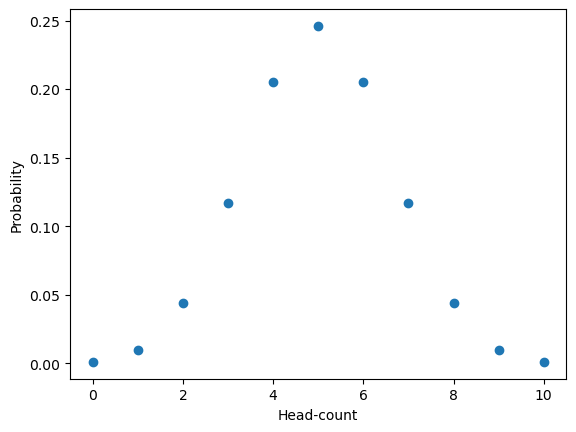

In [31]:
# Plotting the coin-flip probabilities
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

This mapping between x-values and probabilities is referred to as a *probability distribution*. Probability distributions exhibit certain mathematically consistent properties that make them useful for likelihood analysis. For instance, consider the x-values of any probability distribution: they correspond to all the possible values of a random variable *r*. The probability that *r* falls within some interval is equal to the area beneath the probability curve over the span of that interval. Therefore, the total area beneath a probability distribution always equals 1.0. This holds for any distribution, including our head-count plot.

In [32]:
# Confirming that all probabilities sum to 1.0
assert sum(prob_x_10_flips) == 1.0

The area beneath the head-count interval of 8 through 10 is equal to the probability of observing eight heads or more.

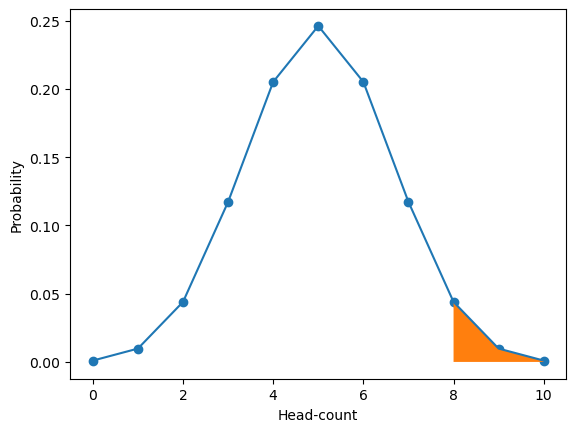

In [33]:
# Shading the Interval under a probability curve
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

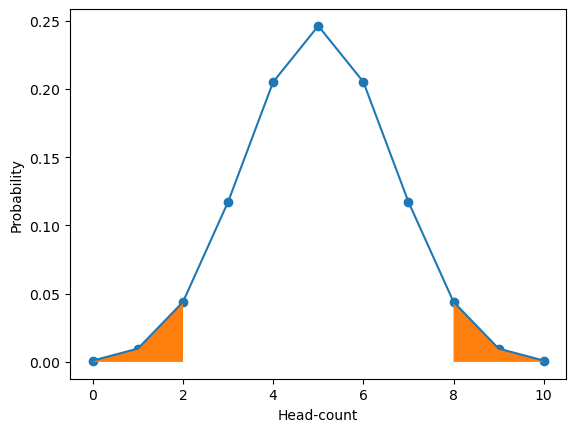

In [34]:
# Shading the interval under the etremes of a probability curve
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

### 2.2.1 Comparing multiple coin-flip probability distributions

Let’s extend our plot to also encompass the distribu- tion for 20 flipped coins. We’ll plot both distributions on a single figure, although first we must compute the x-axis head counts and y-axis probabilities for the 20-coin-flip distribution.

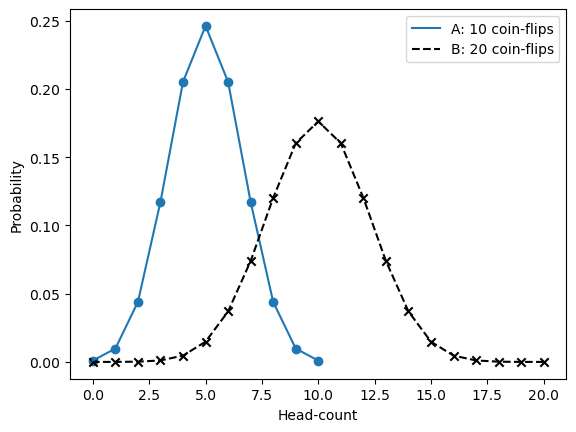

In [35]:
# Computing probabilities for a 20-coin-flip distribution
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

# Plotting two simultaneous distributions
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--',
        label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

We’ve visualized our two distributions. Next, we highlight our interval of interest (80% heads or tails) across each of the two curves. Note that the area beneath the tail ends of distribution B is very small; we remove the scatter points to highlight the tail-end intervals more clearly.

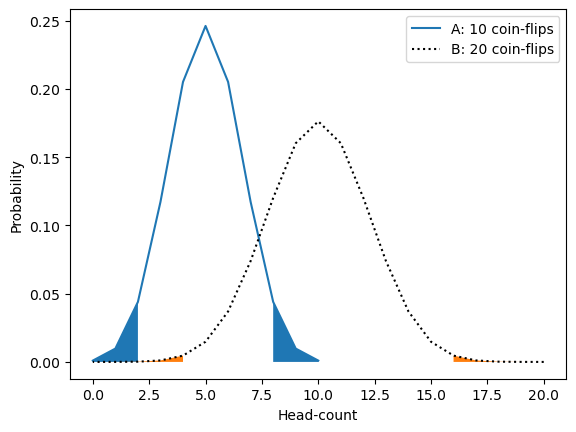

In [36]:
# Highlighting intervals beneath two plotted distributions
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle=':',
        label='B: 20 coin-flips')

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.legend()
plt.show()

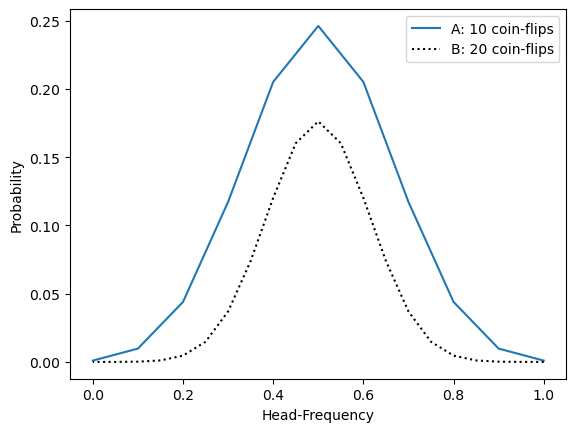

In [37]:
# Converting head counts into frequencies
x_10_frequencies = [head_count / 10 for head_count in x_10_flips]
x_20_frequencies = [head_count / 20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':',
        label='B: 20 coin-flips')
plt.legend()

plt.xlabel('Head-Frequency')
plt.ylabel('Probability')
plt.show()

As expected, the two peaks now both align at the head frequency of 0.5. However, our division by the head counts has reduced the areas beneath the two curves by tenfold and twentyfold, respectively. The total area beneath each curve no longer equals 1.0. This is a problem: as we’ve discussed, the total area under a curve must sum to 1.0 if we wish to infer an interval probability. However, we can fix the area sums if we multiply the y-axis values of curves A and B by 10 and 20. The adjusted y-values will no longer refer to probabilities, so we’ll have to name them something else. The appropriate term to use is *relative likelihood*, which mathematically refers to a y-axis value within a curve whose total area is 1.0.

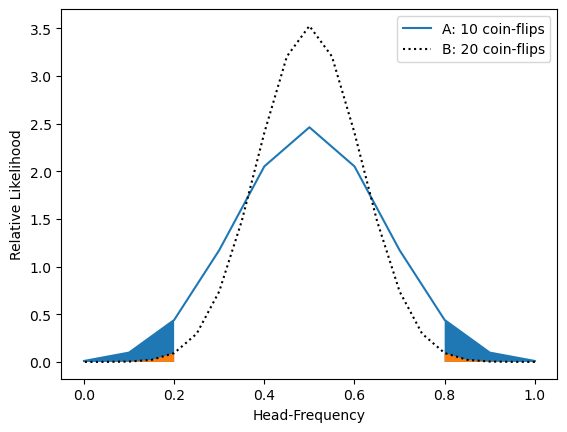

In [38]:
# Computing relative likelihoods of frequencies
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

# Plotting aligned relative likelihood curves
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, color='k', linestyle=':',
        label='B: 20 coin-flips')

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

The relationship between infinite coin flips and absolute certainty is guaranteed by a fundamental theorem in probability theory: the *law of large numbers*. According to that, the frequency of any observation will approach the probability of that observation as the observation count grows large. Thus, a fair-coin distribution becomes dominated by its central frequency of 0.5 as the coin-flip count goes up.

# Section 3: Running random simulations in NumPy

- Basic usage of the NumPy library
- Simulating random observations using NumPy
- Visualizing simulated data
- Estimating unknown probabilities from simulated observations

## 3.1 Simulating random coin flips and die rolls using NumPy


In [39]:
import numpy as np

# Simulating a randomly rolled die
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

# Seeding reproducible random die rolls
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

Adjusting the inputted `x` into `np.random.randint(0, x)` allows us to simulate any number of discrete outcomes. For instance, setting `x` to 52 will simulate a randomly drawn card. Alternatively, setting `x` to 2 will simulate a single flip of an unbiased coin. Let’s generate that coin flip by calling `np.random.randint(0, 2)`; this method call returns a random value equal to either 0 or 1. We assume that 0 stands for tails and 1 stands for heads.

In [40]:
# Simulating one fair coin flip
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


Next, we simulate a sequence of 10 coin flips and then compute the observed frequency of heads.

In [41]:
# Simulating 10 fair coin flips
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


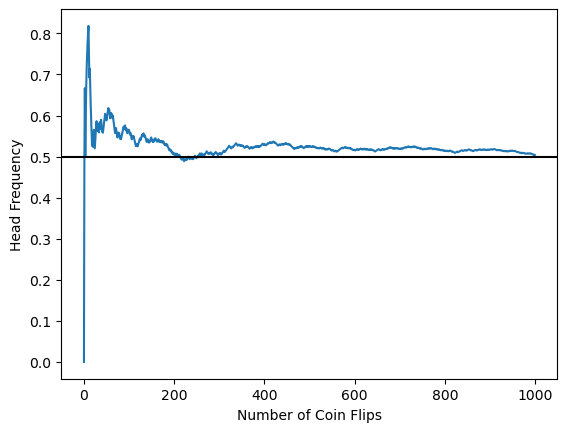

In [42]:
# Plotting simulated fair coin-flip frequencies
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))
    
plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color ='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head Frequency')
plt.show()

### 3.1.1 Analyzing biased coin flips
We’ve simulated a sequence of unbiased coin flips, but what if we wish to simulate a coin that falls on heads 70% of the time? Well, we can generate that biased output by calling `np.random.binomial(1, 0.7)`. The binomial method name refers to the generic coin-flip distribution, which mathematicians call the *binomial distribution*. he method takes as input two parameters: the number of coin flips and the probability of the desired coin-flip outcome. 

In [43]:
# Simulating biased coin flips
np.random.seed(0)
print("Let's flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of "
       f" {number_coin_flips} biased coin flips"))

Let's flip the biased coin once.
Biased coin landed on heads.

Let's flip the biased coin 10 times.
6 heads were observed out of  10 biased coin flips


In [44]:
# Computing coin-flip-frequency convergence
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


The frequency of heads approximates 0.7 but is not actually equal to 0.7. Suppose we recompute the frequency of 1,000 coin flips five more times. Will all the frequencies be lower than 0.7? Will certain frequencies hit the exact value of 0.7? We’ll find out by executing `np.random.binomial(1000, 0.7)` over five looped iterations.

In [45]:
# Recomputing coin-flip-frequency convergence
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")
        


Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


It seems that even though the law of large numbers allows us to approximate the actual probability, some uncertainty still remains. Data science is somewhat messy, and we cannot always be certain of the conclusions we draw from our data. Nevertheless, our uncertainty can be measured and contained using what mathematicians call a *confidence interval*.

## 3.2 Computing confidence intervals using histograms and NumPy arrarys

Suppose we’re handed a biased coin whose bias we don’t know. We flip the coin 1,000 times and observe a frequency of 0.709. We know the frequency approximates the actual probability, but by how much? More precisely, what are the chances of the actual probability falling within an interval close to 0.709 (such as an interval between 0.7 and 0.71)? To find out, we must do additional sampling.

We’ve previously sampled our coin over five iterations of 1,000 coin flips each. The sampling produced some fluctuations in the frequency. Let’s explore these fluctuations by increasing our frequency count from 5 to 500. 

In [46]:
# Computing frequencies with 500 flips per sample
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

# Optimizing the coin-flip-frequency computation
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, size=500)

In [47]:
# Computing frequencies using NumPy
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000 
                                   for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x : x / 1000, head_count_list))

In [48]:
# Printing a NumPy frequency array
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [49]:
# Finding the largest and smallest frequency values
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


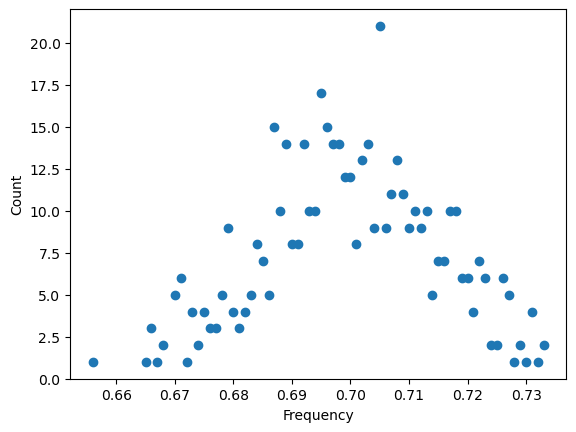

In [50]:
# Plotting measured frequencies
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

The visualization is informative: frequencies close to 0.7 occur more commonly than other, more distant values. However, our plot is also flawed, since nearly identical frequencies appear as overlapping dots in the chart. We should group these proximate frequencies together instead of treating them as individual points.

### 3.2.1 Binning similar points in histogram plots
Let’s try a more nuanced visualization by binning together frequencies that are in close proximity to each other. We subdivide our frequency range into N equally spaced bins and then place all frequency values into one of those bins. By definition, the values in any given bin are at most 1/N units apart. Then we count the total values in each bin and visualize the counts using a plot.

The bin-based plot we just described is called a *histogram*.

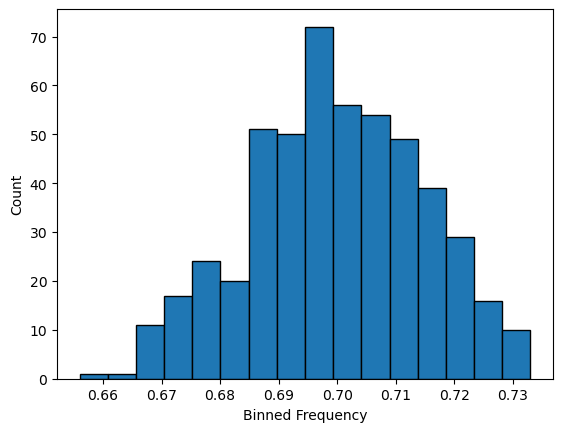

In [51]:
# Plotting a frequency histogram using plt.hist
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 16


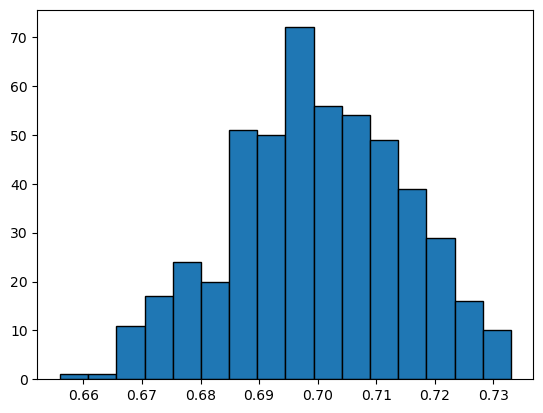

In [52]:
# Counting bins in a plotted histogram
counts, _, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

print(f"Number of Bins: {counts.size}")


Bin width: 0.004812499999999997


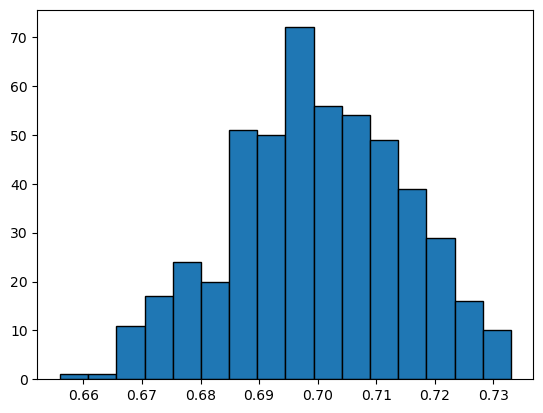

In [53]:
# Finding the width of bins in a histogram
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [54]:
# Getting a bin's frequency and size
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "
          f"{count} element{'' if count == 1 else 's'}"))
    
output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [55]:
# Finding the index of an array's maximum value
assert counts[counts.argmax()] == counts.max()

In [56]:
# Using argmax to return a histogram's peak
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


### 3.2.2 Deriving probabilities from histograms

How can we determine whether the actual probability of heads falls within that range (without knowing the answer in advance)? One option is to calculate the likelihood that a randomly measured frequency falls within 0.694 to 0.699. If that likelihood were 1.0, then 100% of measured frequencies would be covered by the range. 

How should we calculate the likelihood? Earlier, we showed that the likelihood of an interval equals its area under a curve, but only when the total plotted area sums to 1.0. The area under our histogram is greater than 1.0 and thus must be modified by passing `density=True` into `plt.hist`. The passed parameter maintains the histogram’s shape while forcing its area’s sum to equal 1.0.

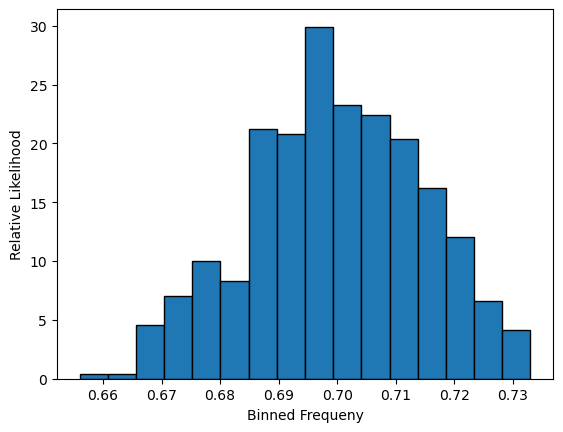

In [57]:
# Plotting a histogram's relative likelihoods
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', 
                                     edgecolor='black', density=True)
plt.xlabel('Binned Frequeny')
plt.ylabel('Relative Likelihood')
plt.show()

In [59]:
# Computing the total area under a histogram
assert likelihoods.sum() * bin_width == 1.0

The histogram’s total area sums to 1.0. Thus, the area beneath the histogram’s peak now equals the probability of a randomly sampled frequency falling within the 0.694 to 0.699 interval range. Let’s compute this value by calculating the area of the bin positioned at `likelihoods.argmax()`.

In [60]:
# Computing the probability of the peak frequencies
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


The probability is approximately 14%. That value is low, but we can increase it by expanding our interval range beyond one bin. We stretch the range to cover neigh- boring bins at indices `likelihoods.argmax() - 1` and `likelihoods.argmax() + 1`.

**NOTE** Python’s indexing notation is inclusive of the start index and exclusive of the end index. Hence, we set the end index to equal `likelihoods.argmax() + 2` to include `likelihoods.argmax() + 1`.

In [64]:
# Increasing the probability of a frequency range
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string =  f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


The three bins cover a frequency range of approximately 0.689 to 0.704. Their associ- ated probability is 0.464. Thus, the three bins represent what statisticians call a 46.4% *confidence interval*, which means we are 46.4% confident that our true probability falls within the three-bin range. That confidence percentage is too low. Statisticians prefer a confidence interval of 95% or more. We reach that confidence interval by iteratively expanding our leftmost bin and rightmost bin until the interval area stretches past 0.95.

In [65]:
# Computing a high confidence interval
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        
        area = likelihoods[start_index: end_index + 1].sum() * bin_width 
    
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string =  f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "
          f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

The frequency range of roughly 0.670 to 0.723 represents a 95.4% confidence inter- val. Thus, a sampled sequence of 1,000 biased coin flips should fall within that range 95.4% of the time. We’re fairly confident that the true probability lies somewhere between 0.670 and 0.723. However, we still cannot tell for sure whether the true prob- ability is closer to 0.67 or 0.72. We need to somehow narrow that range to obtain a more informative probability estimation.

### 3.2.3 Shrinking the range of a high confidence interval

How can we taper down our range while maintaining a 95% confidence interval? Per- haps we should try elevating the frequency count from 500 to something noticeably larger. Previously, we’ve sampled 500 frequencies, where each frequency represented 1,000 biased coin flips. Instead, let’s sample 100,000 frequencies while keeping the coin-flip count constant at 1,000.

In [66]:
# Sampling 100,000 frequencies
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

We will recompute the histogram on the updated `frequency_array`, which now holds 200-fold more frequency elements. Then we visualize that histogram while also searching for a high confidence interval. Let’s incorporate the confidence interval into our visualization by coloring the histogram bars in its range.

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


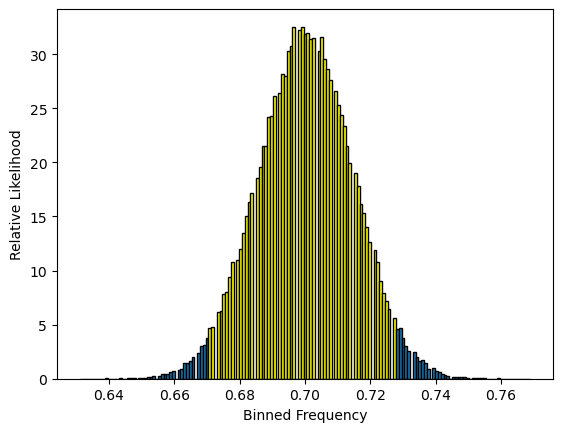

In [67]:
# Coloring histogram bars over an interval
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                          edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

This new frequency range is nearly identical to the one we saw before: increasing the frequency sample size did not reduce the range. Perhaps we should also increase the number of coin flips per frequency sample from 1,000 to 50,000. We keep the frequency sample size steady at 100,000, thus leading to 5 billion flipped coins.

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


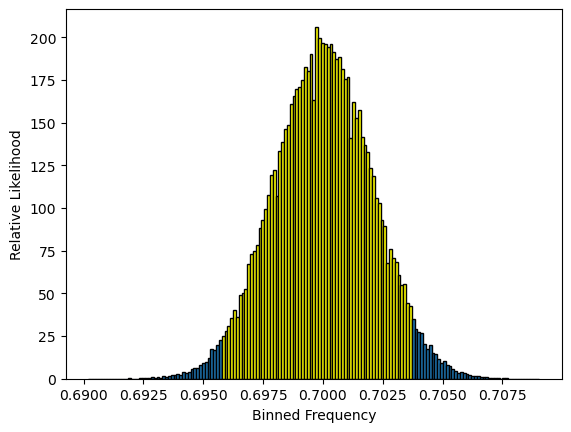

In [68]:
# Sampling 5 billion flipped coins
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                          edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')

plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

The new 95.06% confidence interval covers a frequency range of roughly 0.695 to 0.703. If we round the range to two decimal places, it equals 0.70 to 0.70. We are thus exceedingly confident that our true probability is approximately 0.70. By increasing the coin flips per sample, we’ve successfully narrowed the range of our 95% confidence interval.

On a separate note, our updated histogram once again resembles a bell-shaped curve. That curve is referred to as either the *Gaussian distribution* or the *normal distribution*. The normal distribution is incredibly important to probability theory and statistics due to the **central limit theorem**. According to this theorem, sampled frequency distributions take the shape of a normal distribution when the number of samples is large. Furthermore, the theorem predicts a narrowing of likely frequencies as the size of each frequency sample increases. This is perfectly consistent with our observations, which are summarized here:

1. Initially, we sampled 1,000 coin flips 500 times.
2. Each sequence of 1,000 coin flips was converted to a frequency.
3. We plotted the histogram of 500 frequencies representing 50,000 total coin flips.
4. The histogram shape was not symmetric. It peaked at approximately 0.7.
5. We increased the frequency count from 500 to 100,000.
6. We plotted the histogram of 100,000 frequencies representing 1 million total coin flips.
7. The new histogram’s shape resembled a normal curve. It continued peaking at 0.7.
8. We summed the rectangular area of bins around the peak. We stopped once the added bins covered 95% of the area under the histogram.
9. These bins represented a frequency range of approximately 0.670–0.723.
10. We increased the coin flips per sample from 1,000 to 50,000.
11. We plotted the histogram of 100,000 frequencies representing 5 billion total coin flips.
12. The updated histogram’s shape continued to resemble a normal curve.
13. We recomputed the range covering 95% of the histogram’s area.
14. The range width shrank to approximately 0.695–0.703.
15. Thus, when we increased our per-frequency flip count, the range of likely frequencies began to narrow at around 0.7.

### 3.2.4 Computing histograms in NumPy

Calling the `plt.hist` method automatically generates a histogram plot. We can obtain the histogram likelihoods and bin edges without creating a plot by calling `np.histogram`.

In [69]:
# Computing a histogram using np.histogram
np.random.seed(0)

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(47, 114)

## 3.3 Using confidence intervals to analyze a biased deck of cards

Suppose you’re shown a biased 52-card deck. Each card is either red or black, but the color counts aren’t equal. How many red cards are present in the deck? You could find out by counting all the red cards one by one, but that would be too easy. Let’s add a constraint to make the problem more interesting. You are only allowed to see the first card in the deck! If you wish to see a new card, you must first reshuffle. You’re permitted to reshuffle as many times as you like and to view the top card after each shuffle.

Given these constraints, we must solve the problem using random sampling. Let’s begin by modeling a 52-card deck with an unknown number of red cards. That red count is an integer between 0 and 52, which we can generate using `np.random.randint`. We’ll keep the value of our random `red_card_count` value hidden until we’ve found a solution using sampling.

In [70]:
# Generating a random red card count
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

Now let’s compute `black_card_count` by using the constraint that `red_card_count` and `black_card_count` must sum to 52 cards total. We also maintain bias by ensuring that the two counts are not equal.

In [71]:
# Generating a black card count
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

During the modeling phase, we’ll shuffle the deck and flip over the first card. What is the probability the card will be red? Well, a red card represents one of two possible outcomes: red or black. These outcomes can be characterized by the sample space `{'red_card', 'black_card'}`, but only when the two outcomes are equally likely. However, in our biased deck, the outcomes are weighted by `red_card_count` and `black_card_count`. A weighted sample space `dict` is therefore required, in which the dictionary values equal the count variables. We label the associated keys `'red_card'` and `'black_card'`. Passing `weighted_sample_space` into `compute_event_probability` will allow us to compute the probability of drawing a red card.

In [72]:
# Computing card probabilities using a sample space
weighted_sample_space = {'red_card': red_card_count,
                         'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)

How should we utilize `prob_red` to model a flipped-over first card? Well, the card flip will produce one of two possible outputs: red or black. These two outcomes can be modeled as coin flips in which heads and tails are replaced by colors. Therefore, we can model the flipped card using the binomial distribution. Calling `np.random.binomial (1, prob_red)` returns 1 if the first card is red and 0 otherwise.

In [73]:
# Simulating a random card
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


We shuffle the deck 10 times and flip over the first card after each shuffle.

In [74]:
# Simulating 10 random cards
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} out of 10 shuffles, a red card campe up first.")

In 8 out of 10 shuffles, a red card campe up first.


A red card appeared at the top of the deck in 8 out of 10 random shuffles. Does this mean that 80% of the cards are red? Of course not. We’ve previously shown how such outcomes are common when the sampling size is low. Instead of shuffling the deck 10 times, let’s shuffle it 50,000 times. Then we compute the frequency and then redo the shuffling procedure another 100,000 times. We execute these steps by calling `np.random .binomial(50000, prob_red, 100000)` and dividing by 50,000. The resulting frequency array can be transformed into a histogram that will allow us to compute a 95% confidence interval for flipping over a red card. We compute the confidence interval by expanding the range of bins around the histogram’s peak until that range covers 95% of the histogram’s area.

In [75]:
# Computing card probability confidence intervals
np.random.seed(0)
# Counts the observed red cards out of 50,000 shuffles; repeats 100,000 times
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
# Converts 100,000 red counts into 100,000 frequencies
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.842865 - 0.849139 represents a 95.16% confidence interval


In [76]:
# Estimating the red card count
range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


In [77]:
# Validating the red card count
if red_card_count == 44:
    print('We are correct! There are 44 red cards in the deck')
else:
    print('Oops! Our sampling estimation was wrong.')

We are correct! There are 44 red cards in the deck


## 3.4 Using permutations to shuffle cards

Card shuffling requires us to randomly reorder the elements of a card deck. That random reordering can be carried out using the `np.random.shuffle` method. The function takes as input an ordered array or list and shuffles its elements in place. The following code randomly shuffles a deck of cards containing two red cards (represented by 1s) and two black cards (represented by 0s).

In [78]:
# Shuffling a four-card deck
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


If we prefer to carry out the shuffle while retaining a copy of the original unshuffled deck, we can do so using `np.random.permutation`. The method returns a NumPy array containing a random ordering of cards. Meanwhile, the elements of the original inputted deck remain unchanged.

In [79]:
# Returning a copy of the shuffled deck
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


The random ordering of elements returned by `np.random.permutation` is mathematically called a *permutation*. Random permutations vary from the original ordering most of the time. On rare occasions, they may equal the original, unshuffled permutation. What is the probability that a shuffled permutation will exactly equal `unshuffled_deck`?

We can of course find out through sampling. However, the four-element deck is small enough to be analyzed using sample spaces. Composing the sample space requires us to cycle through all possible permutations of the deck. We can do so using the `itertools.permutations` function. Calling `itertools.permutations(unshuffled_deck)` will return an iterable over every possible permutation of the deck. Let’s use the function to output the first three permutations. Note that these permutations are printed as Python tuples, not as arrays or lists. Tuples, unlike arrays or lists, cannot be modified in place: they are represented using parentheses.

In [80]:
# Iterating over card permutations
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


Certain permutations of the four-card deck occur more than once. Thus, we can hypothesize that certain permutations might occur more frequently than others. Let’s check this hypothesis by storing the permutation counts in a `weighted_sample_space` dictionary.

In [81]:
# Computing permutation counts
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1
    
for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


All the permutations occur with equal frequency. Consequently, all card arrangements are equally likely, and a weighted sample space is not required. An unweighted sample space equal to `set(itertools.permutations(unshuffled_deck))` should sufficiently resolve the problem.

In [82]:
# Computing permutation probabilities
# The unweighted sample space equals the set of all the unique permutations of the deck
sample_space = set(itertools.permutations(unshuffled_deck))
# Defines a lambda function that takes as input some x and returns True if x equals our unshuffled deck. 
# This one-line lambda function serves as our event condition.
event_condition = lambda x: list(x) == unshuffled_deck
# Computes the probability of observing an event that satisfies our event condition
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

Probability that a shuffle does not alter the deck is 0.16666666666666666


Suppose we are handed a generic unshuffled_deck of size N containing N/2 red cards. Mathematically, it can be shown that all the color permutations of the deck will occur with equal likelihood. Thus, we can compute probabilities directly using the deck’s unweighted sample space. Unfortunately, creating this sample space is not feasible for a 52-card deck since the number of possible permutations is astronomically large: 8.06 × 10^67, which is larger than the number of atoms on Earth. If we attempted to compute a 52-card sample space, our program would run for many days before eventually running out of memory. However, such a sample space can easily be computed for a smaller 10-card deck.

In [83]:
# Computing a 10-card sample space
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)} elements")

Sample space for a 10-card deck contains 252 elements


We have been tasked with finding the best strategy for drawing a red card. The 10-card `sample_space` set could prove useful in these efforts: the set allows us to compute the probabilities of various competing strategies directly. We can thus rank our strategies based on their 10-card deck performance and then apply the top-ranking strategies to a 52-card deck.